<h1><u> Importing Libraries </u></h1>

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

print("Done")

Done


In [3]:
# Personal preference for graphs

plt.style.use("dark_background")

<h1><u>Reading in data</u></h1>

In [4]:
# Training and test data
training_data = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/train.csv", index_col="id")
to_predict = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/test.csv", index_col="id")

# Additional data
oil_data = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/oil.csv")
holiday_events = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv")
stores_data = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/stores.csv", index_col="store_nbr")
transaction_data = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/transactions.csv")

In [5]:
print(f"Start date of predict: {to_predict['date'].min()}\nEnd date of prediction: {to_predict['date'].max()}")

Start date of predict: 2017-08-16
End date of prediction: 2017-08-31


In [6]:
print(training_data.shape)
training_data.head()

(3000888, 5)


,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


In [7]:
training_data["date"] = pd.to_datetime(training_data["date"])

In [8]:
print(to_predict.shape)
to_predict.head()

(28512, 4)


,date,store_nbr,family,onpromotion
id,,,,
3000888,2017-08-16,1,AUTOMOTIVE,0
3000889,2017-08-16,1,BABY CARE,0
3000890,2017-08-16,1,BEAUTY,2
3000891,2017-08-16,1,BEVERAGES,20
3000892,2017-08-16,1,BOOKS,0


In [9]:
to_predict["date"] = pd.to_datetime(to_predict["date"])

In [10]:
oil_data.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [11]:
oil_data["date"] = pd.to_datetime(oil_data["date"])

In [12]:
holiday_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [13]:
holiday_events["date"] = pd.to_datetime(holiday_events["date"])

In [14]:
stores_data.head()

,city,state,type,cluster
store_nbr,,,,
1,Quito,Pichincha,D,13
2,Quito,Pichincha,D,13
3,Quito,Pichincha,D,8
4,Quito,Pichincha,D,9
5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [15]:
transaction_data.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [16]:
transaction_data["date"] = pd.to_datetime(transaction_data["date"])

In [17]:
all_data = pd.concat([training_data, to_predict])

<h1><u>Exploritory Data Analysis (EDA)</u></h1>

In [18]:
def draw(data, x=None, y=None, overlap=None):
    plt.figure(figsize=(30,10))
    plt.grid()
    sns.lineplot(data, x=x, y=y)
    
    if overlap is not None:
        for plot in overlap:
            sns.lineplot(data=plot[0], x=plot[1], y=plot[2])

In [19]:
print(f"Start date: {to_predict.date.min()}\nEnd date: {to_predict.date.max()}")

Start date: 2017-08-16 00:00:00
End date: 2017-08-31 00:00:00


Last 15 days of August

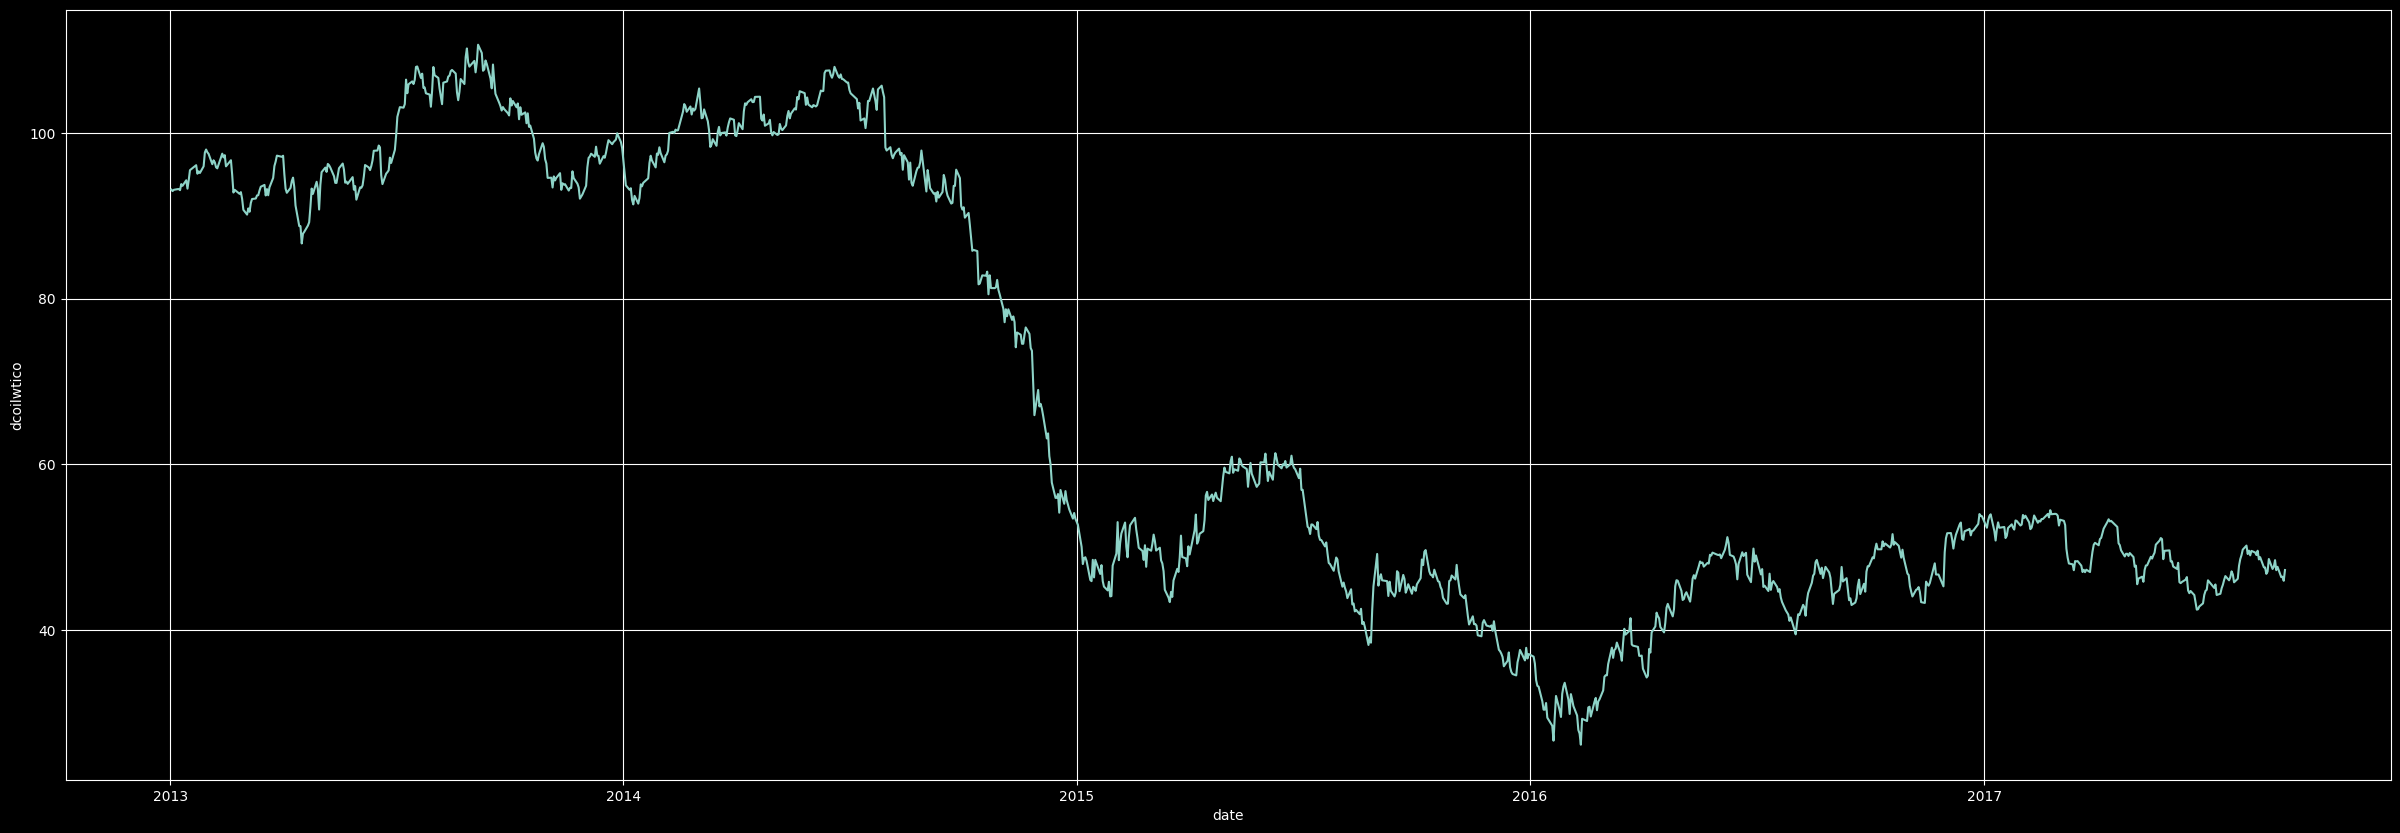

In [20]:
draw(oil_data, x="date", y="dcoilwtico")

Huge crash. "Stable" from August 2016 

In [21]:
training_date_min = pd.to_datetime("2016-08-01")

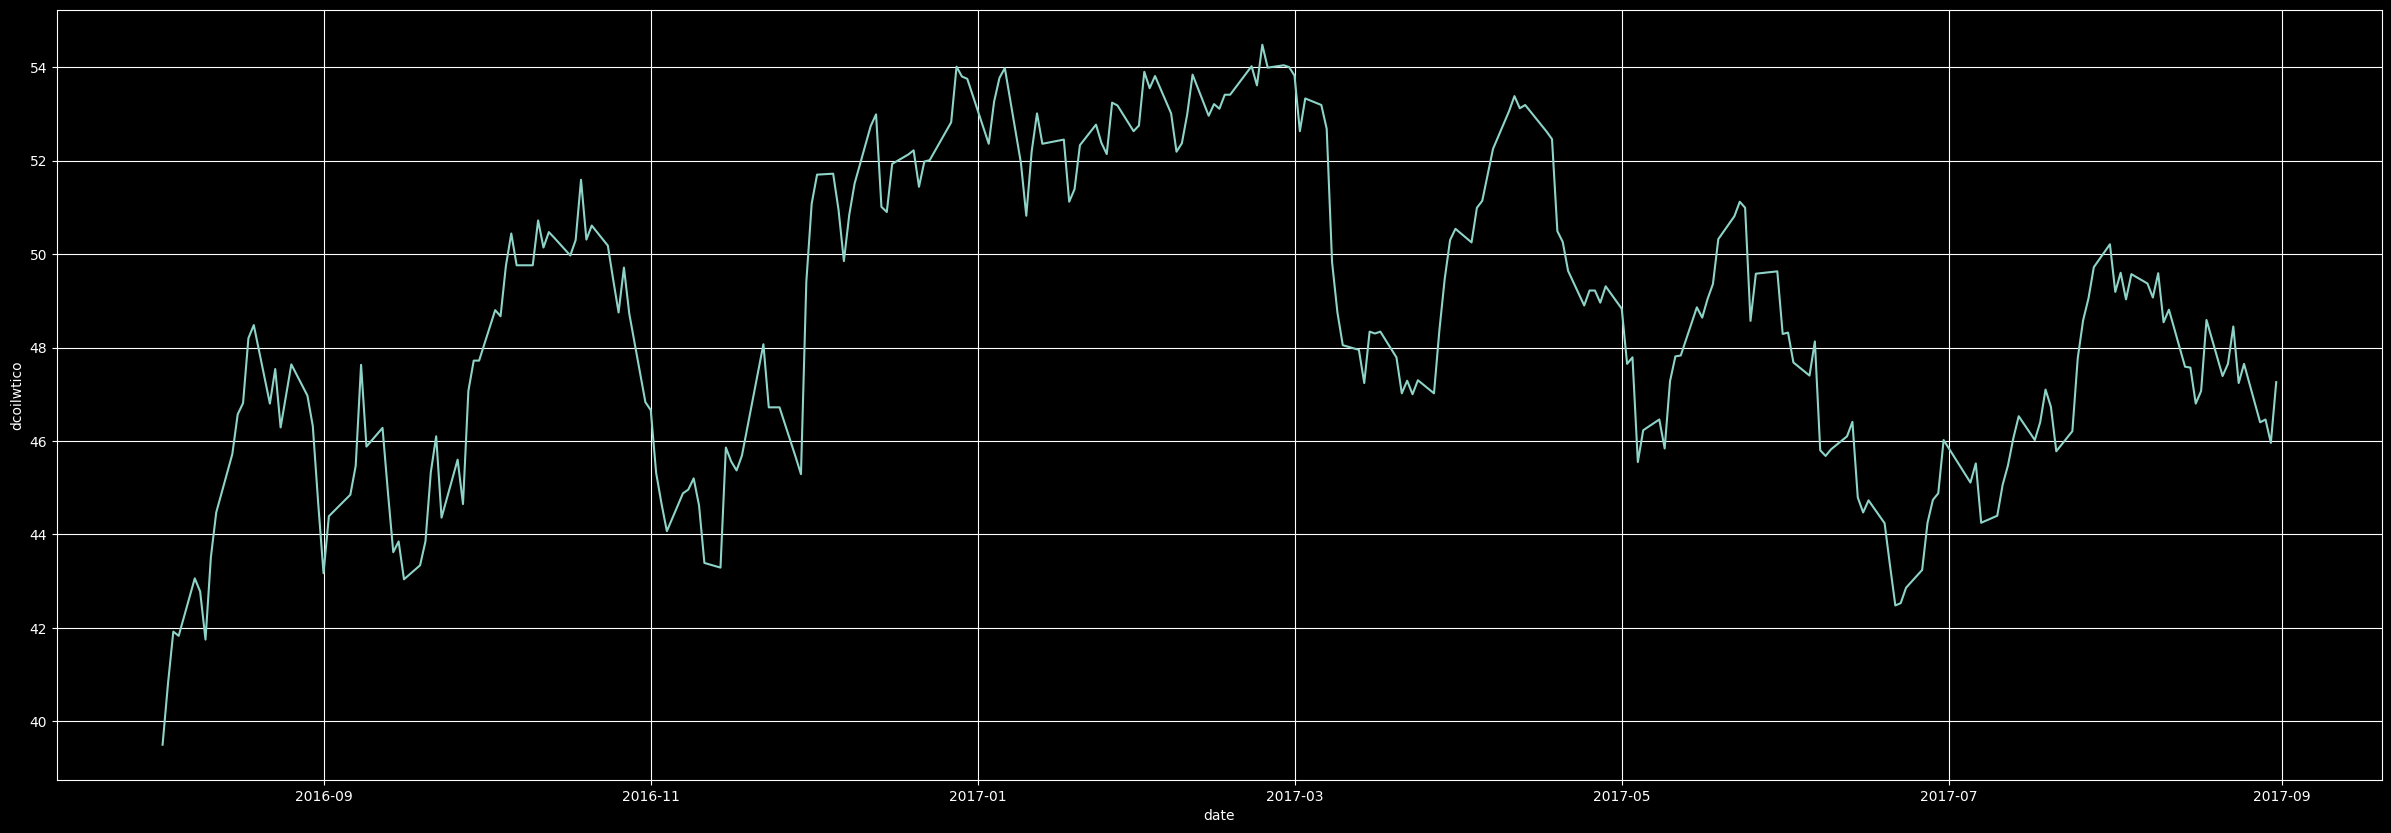

In [22]:
draw(oil_data[oil_data["date"] > training_date_min], x="date", y="dcoilwtico")

In [23]:
all_transactions = transaction_data[transaction_data["date"] > training_date_min].groupby(["date"])["transactions"].mean().to_frame()

In [24]:
all_transactions.head()

,transactions
date,
2016-08-02,1604.603774
2016-08-03,1594.943396
2016-08-04,1481.433962
2016-08-05,1596.528302
2016-08-06,1757.471698


(0.0, 3300.0)

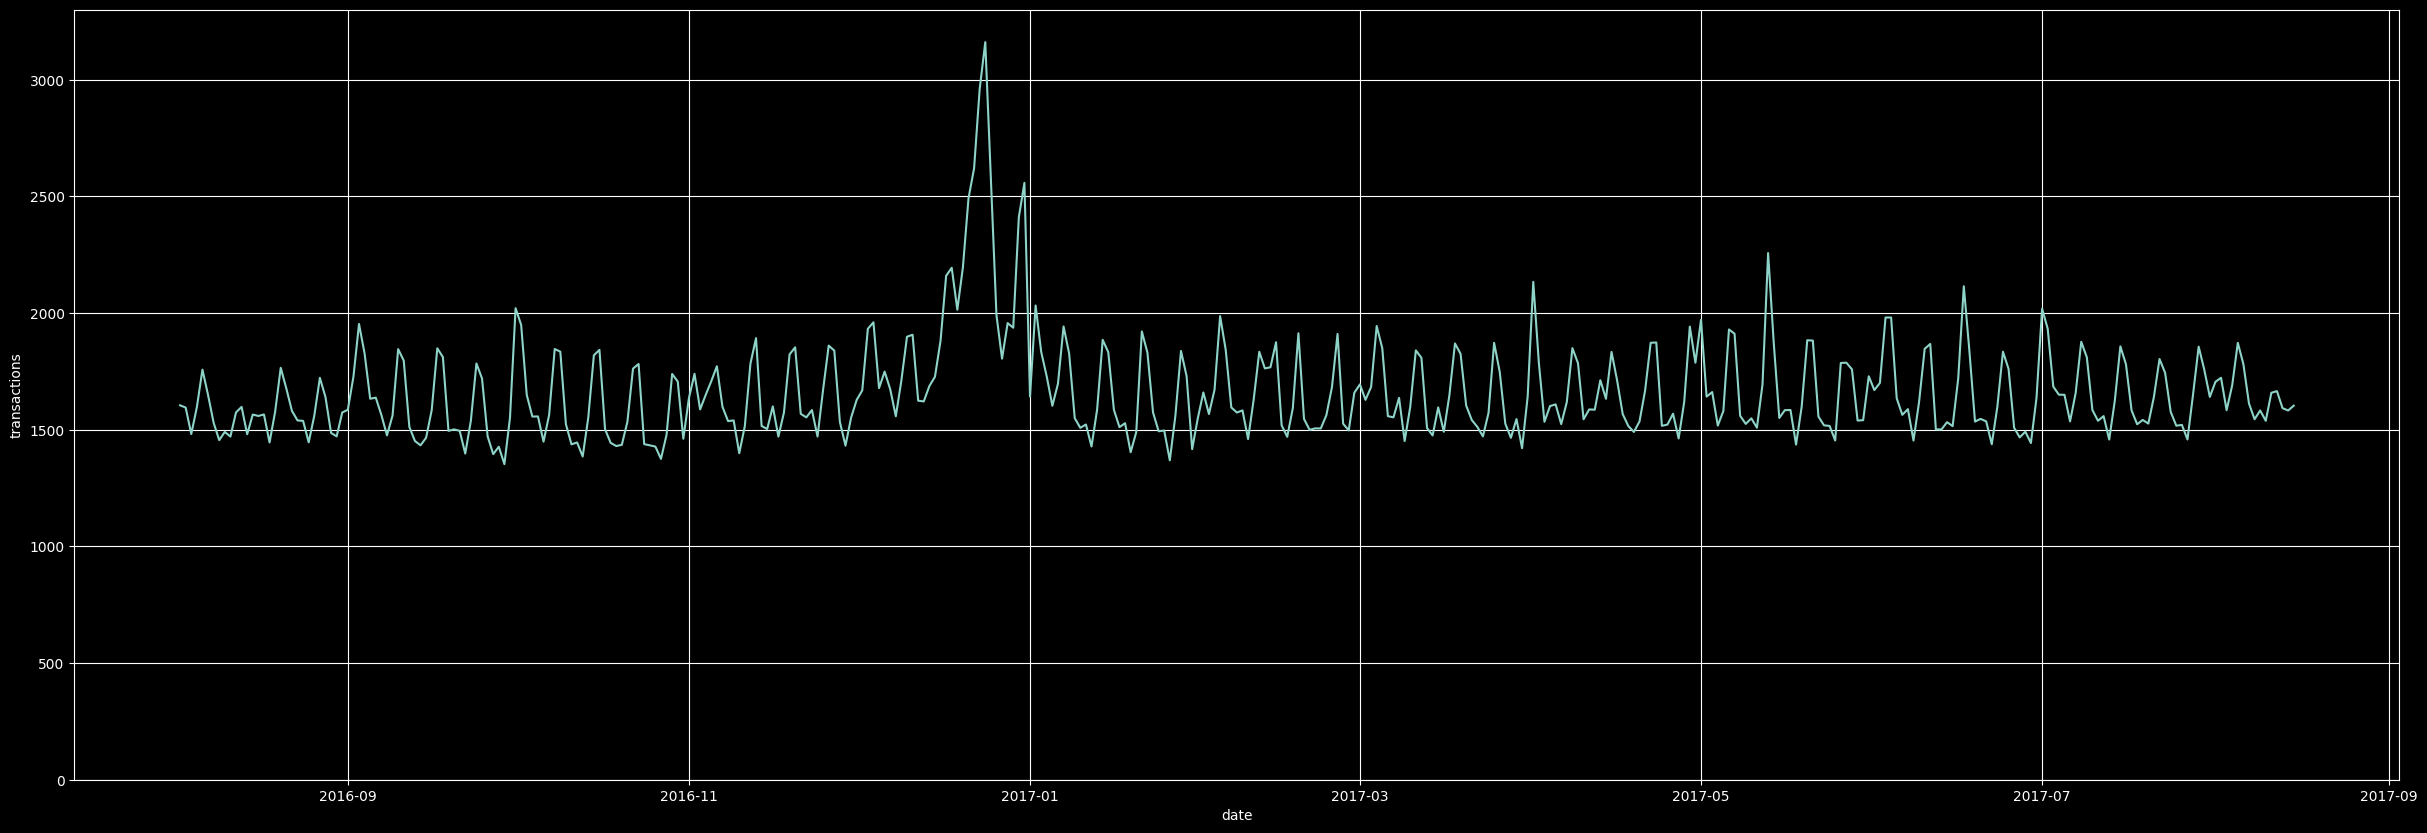

In [25]:
draw(all_transactions, x="date", y="transactions")
plt.ylim(0, 3300)

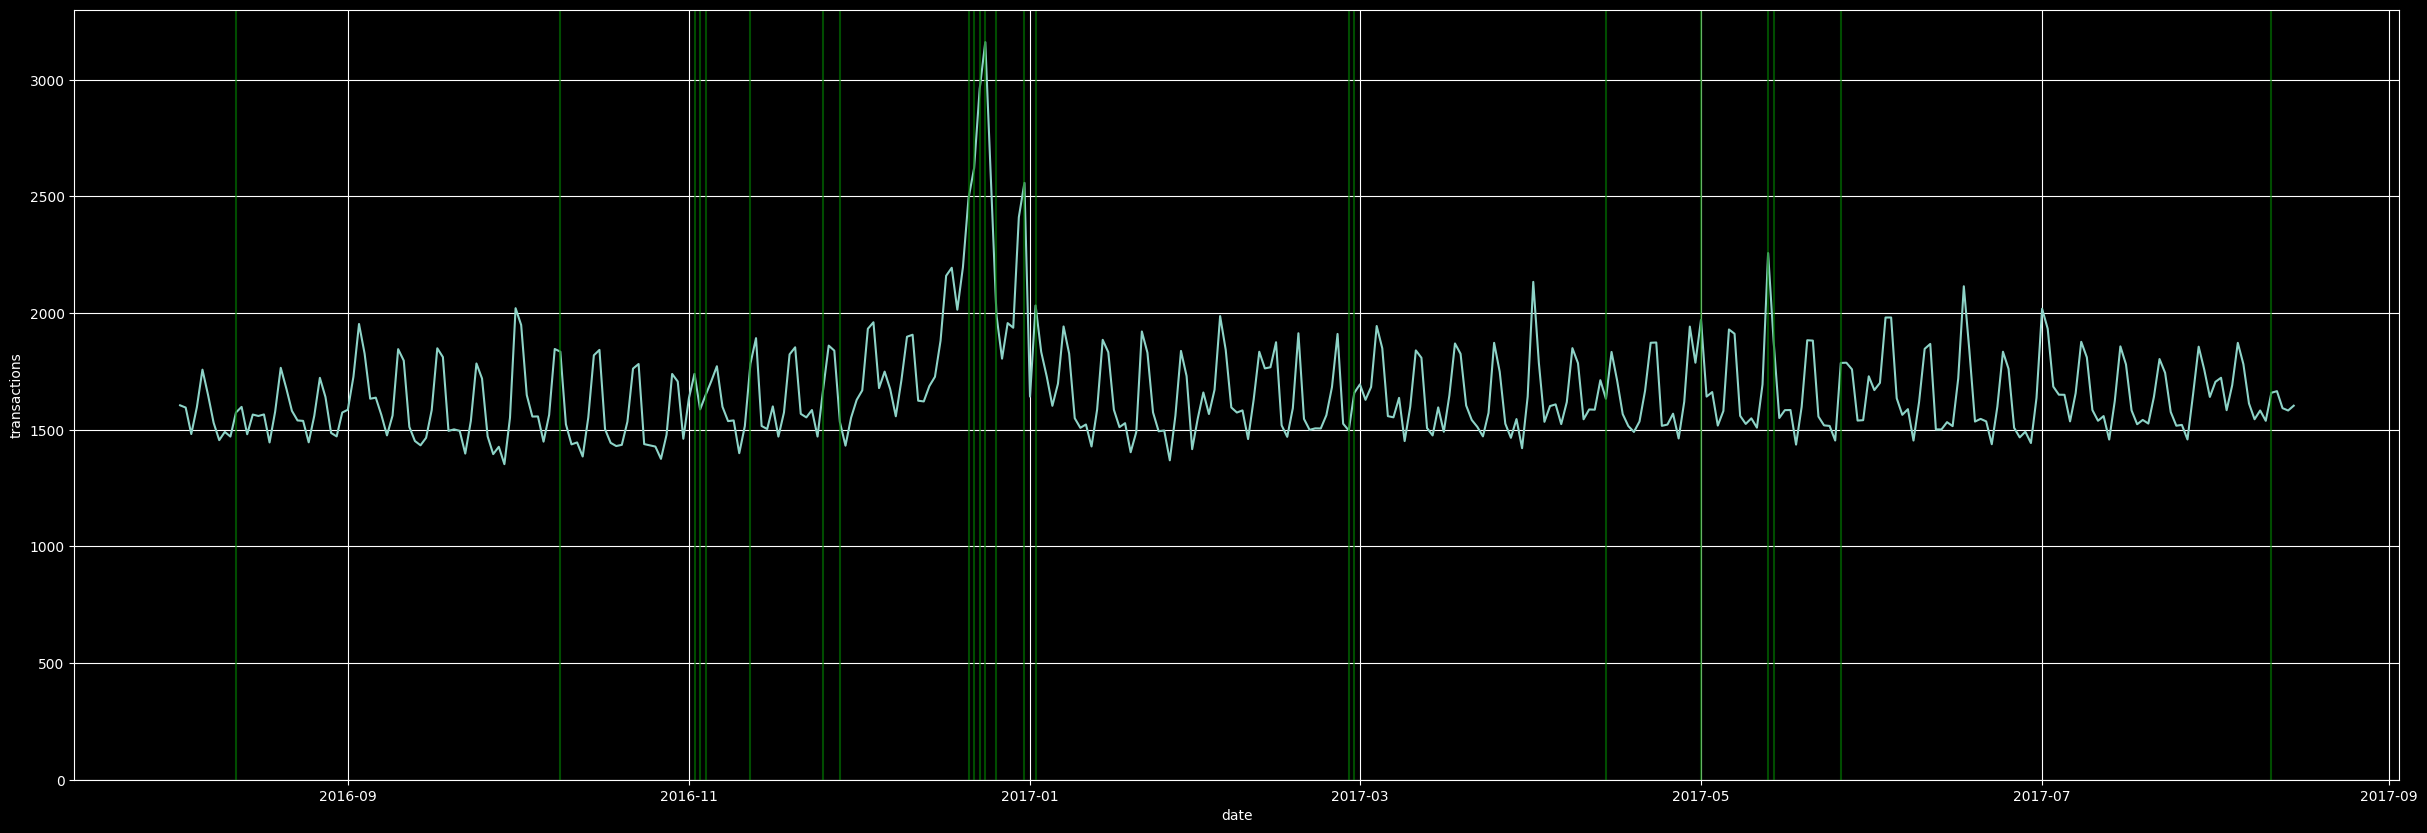

In [26]:
draw(all_transactions, x="date", y="transactions")
plt.ylim(0, 3300)

national_hol_dates = holiday_events[(holiday_events["locale"] == "National") & (holiday_events["transferred"] == False)]

for date in all_transactions.index:
    if date in national_hol_dates.date.values:
        plt.axvline(date, alpha=0.6, color="g")

In [27]:
all_sales = training_data.groupby(["date"])["sales"].mean().to_frame()
all_sales = all_sales[all_sales.index > training_date_min]

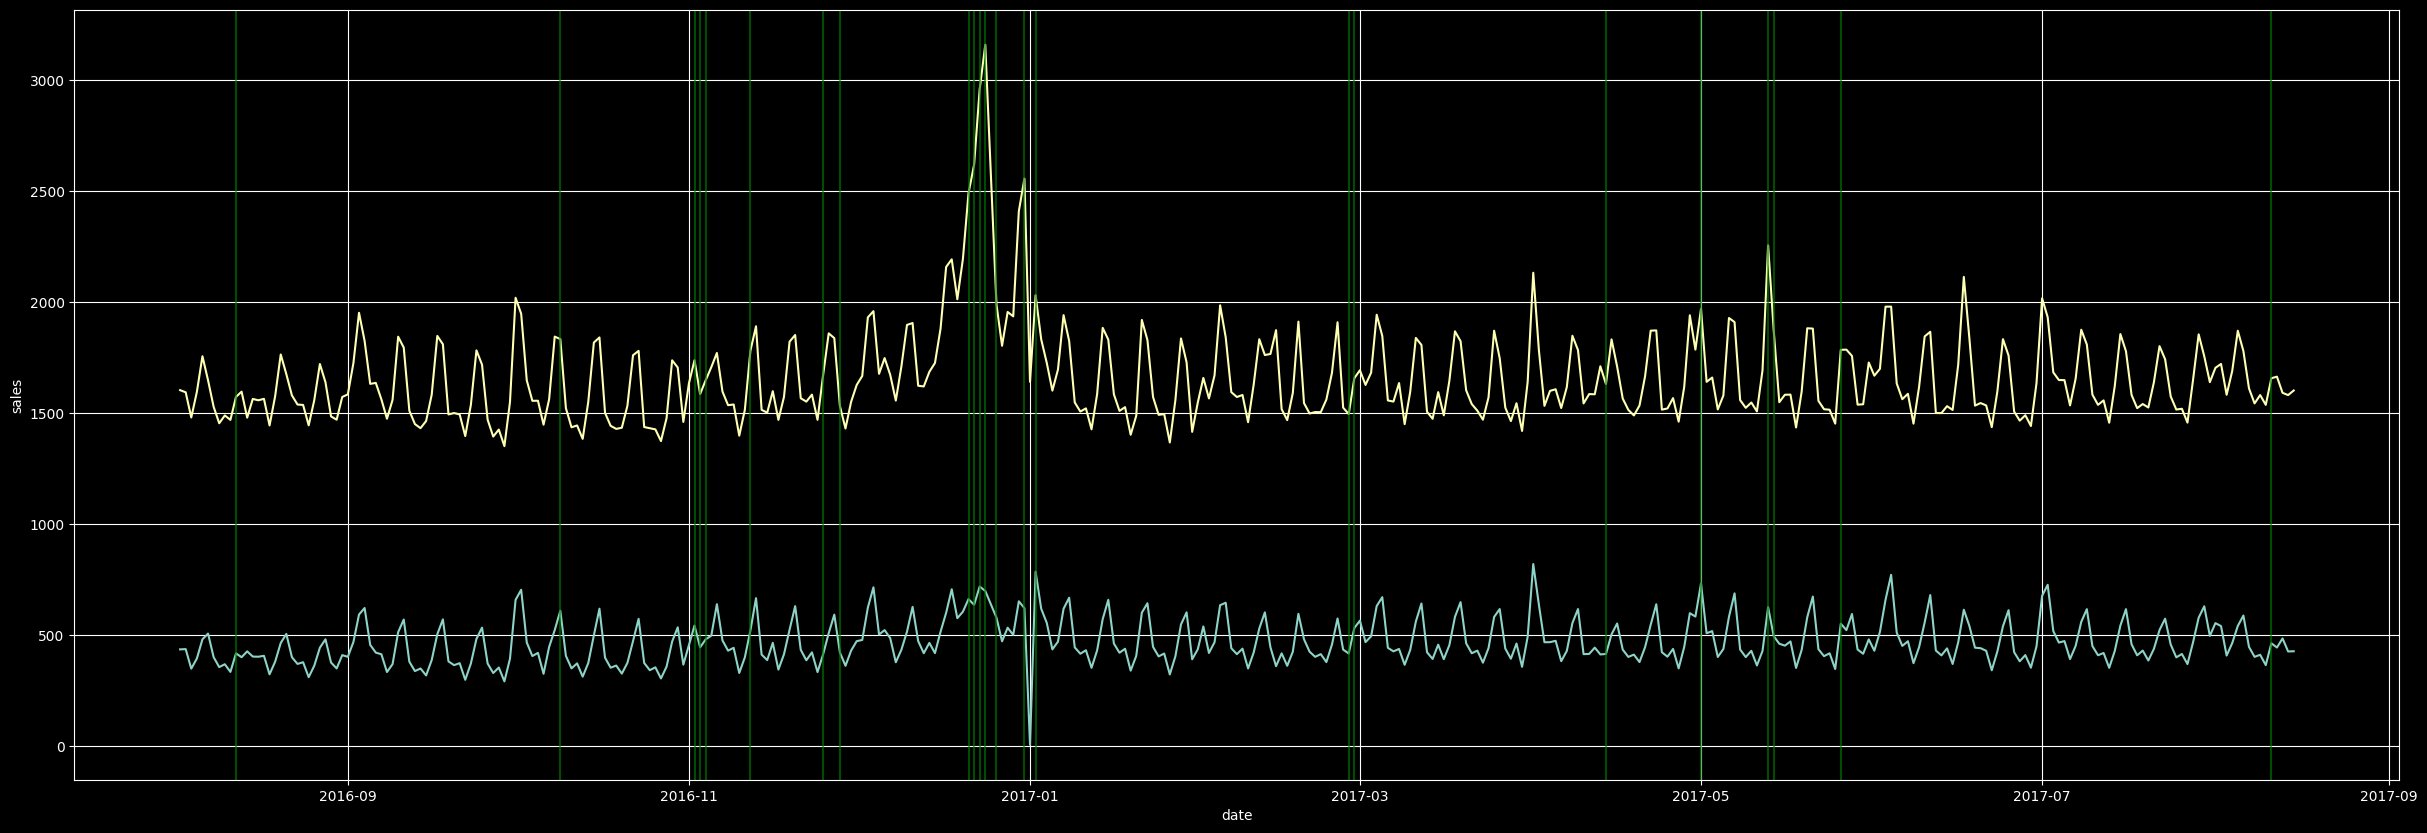

In [28]:
draw(all_sales, "date", "sales", [[all_transactions, "date", "transactions"]])

for date in all_transactions.index:
    if date in national_hol_dates.values:
        plt.axvline(date, alpha=0.6, color="g")

In [29]:
rows_to_drop = all_transactions[(all_transactions.index > pd.to_datetime("2016-12-20")) & (all_transactions.index < pd.to_datetime("2017-01-05"))]

In [30]:
rows_to_drop.head()

,transactions
date,
2016-12-21,2491.698113
2016-12-22,2620.603774
2016-12-23,2960.981132
2016-12-24,3161.169811
2016-12-26,1991.018868


In [31]:
print(all_sales["sales"].corr(all_transactions["transactions"]))

0.8014749491847137


In [32]:
all_transactions = all_transactions.drop(rows_to_drop.index)

In [33]:
print(all_sales["sales"].corr(all_transactions["transactions"]))

0.8918355742892057


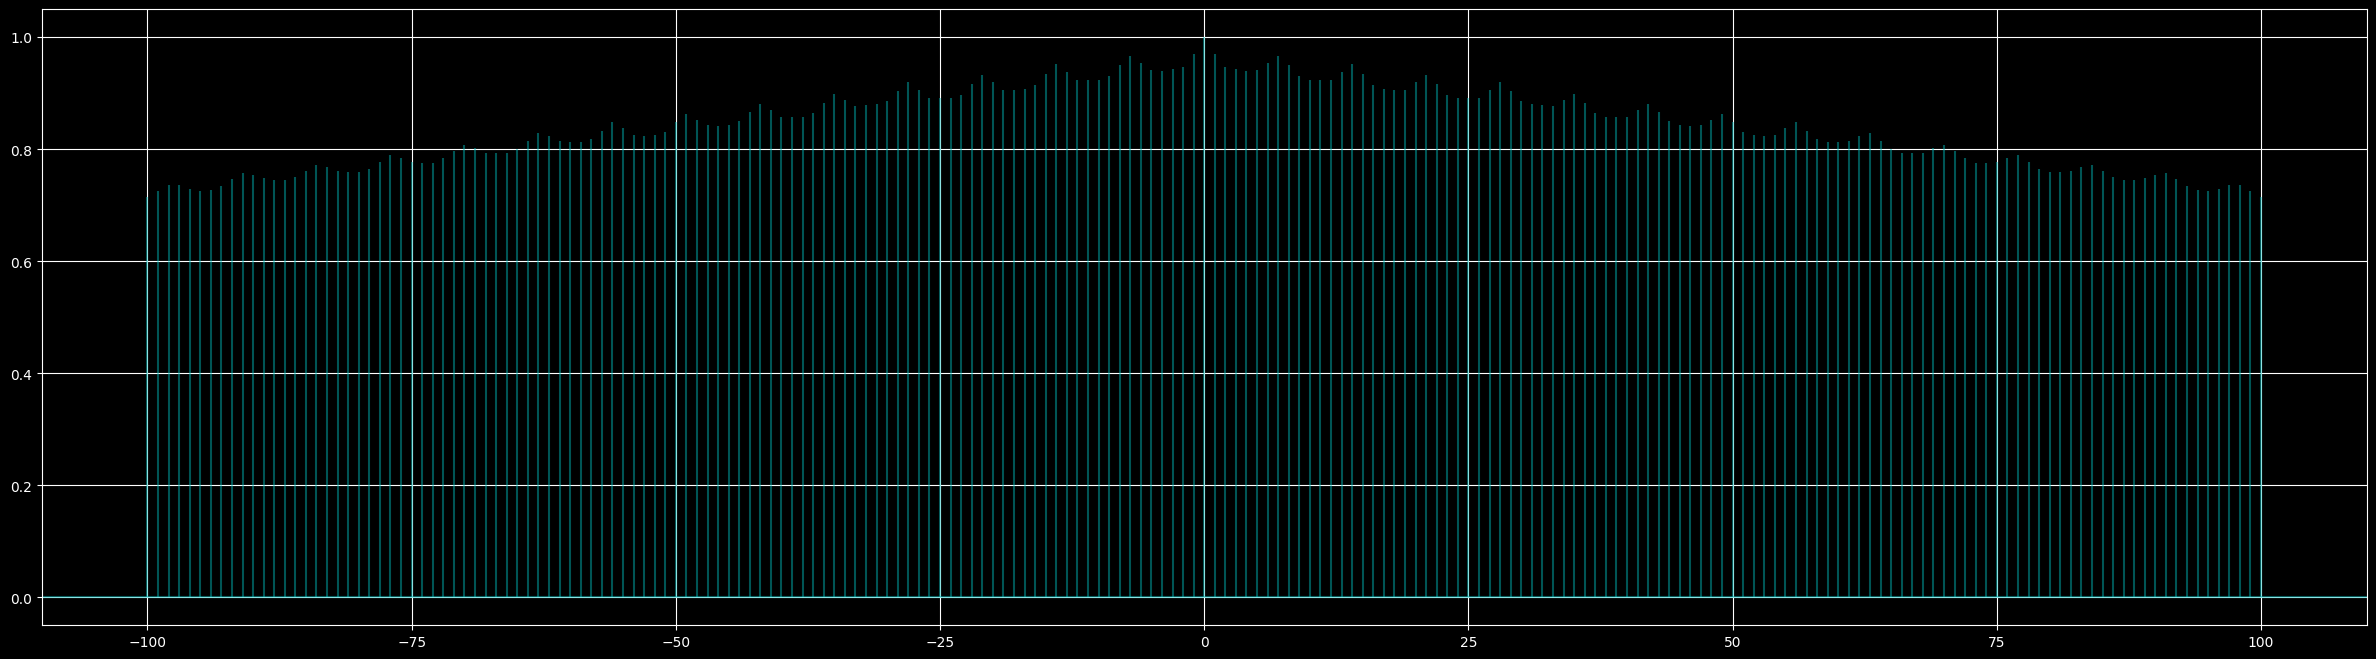

In [34]:
plt.figure(figsize=(30,8))
plt.grid()
plt.acorr(all_sales["sales"], maxlags=100, color="c", alpha=0.45);

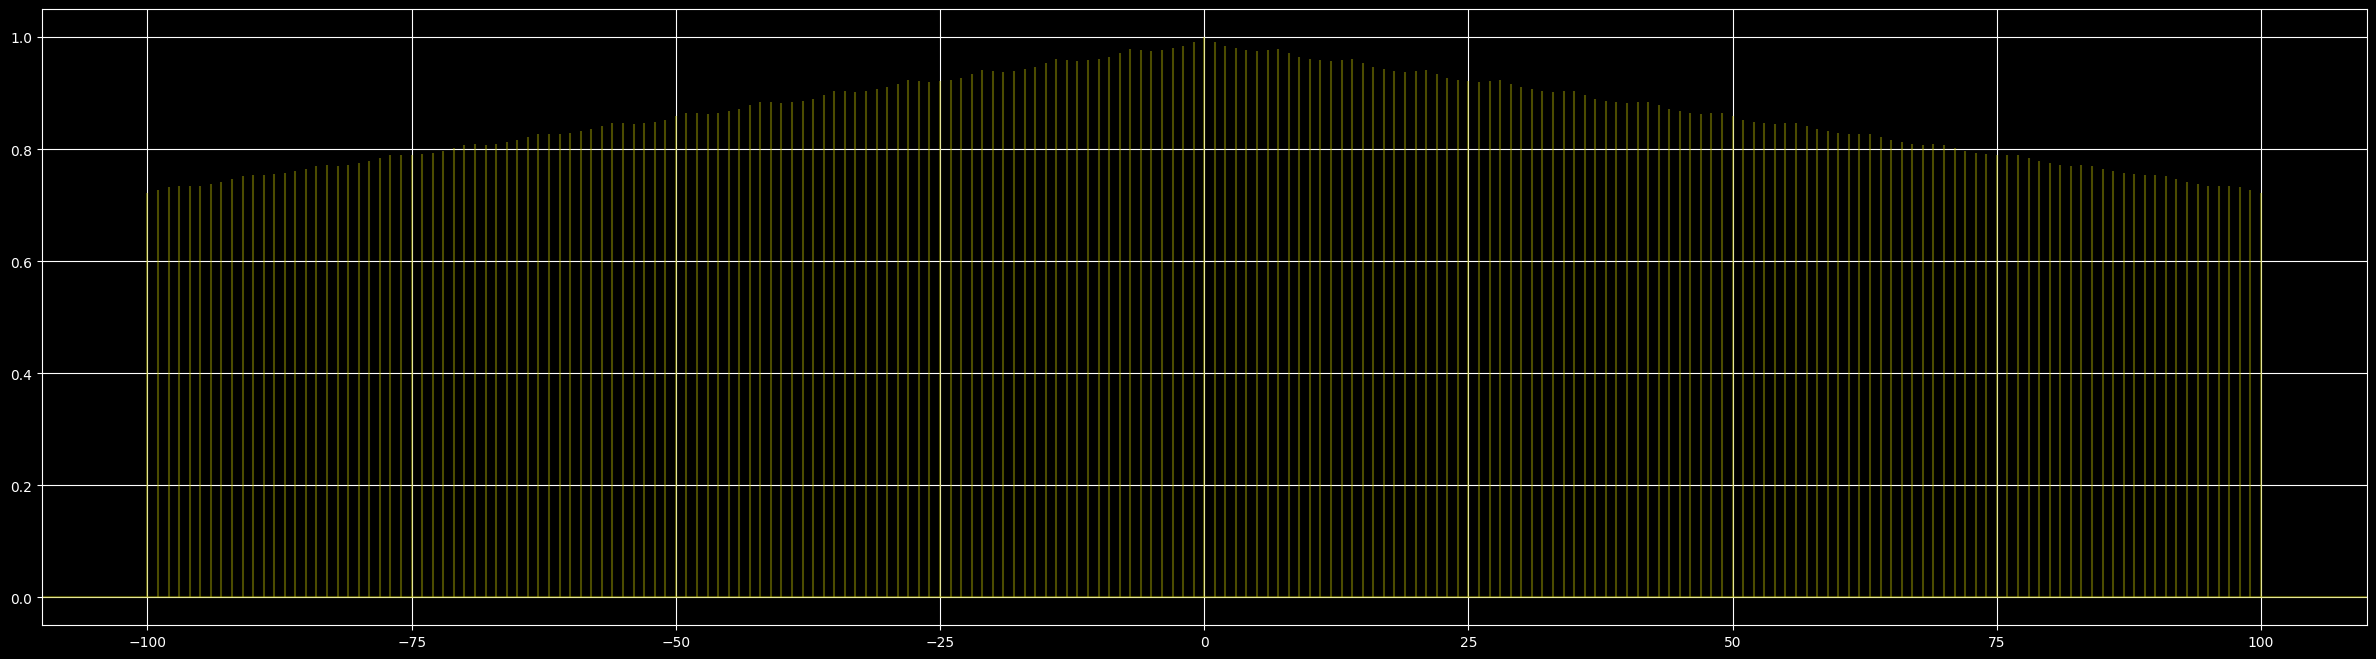

In [35]:
plt.figure(figsize=(30,8))
plt.grid()
plt.acorr(all_transactions["transactions"], maxlags=100, color="y", alpha=0.4);

In [36]:
lags = [1, 7, 14, 21, 28]

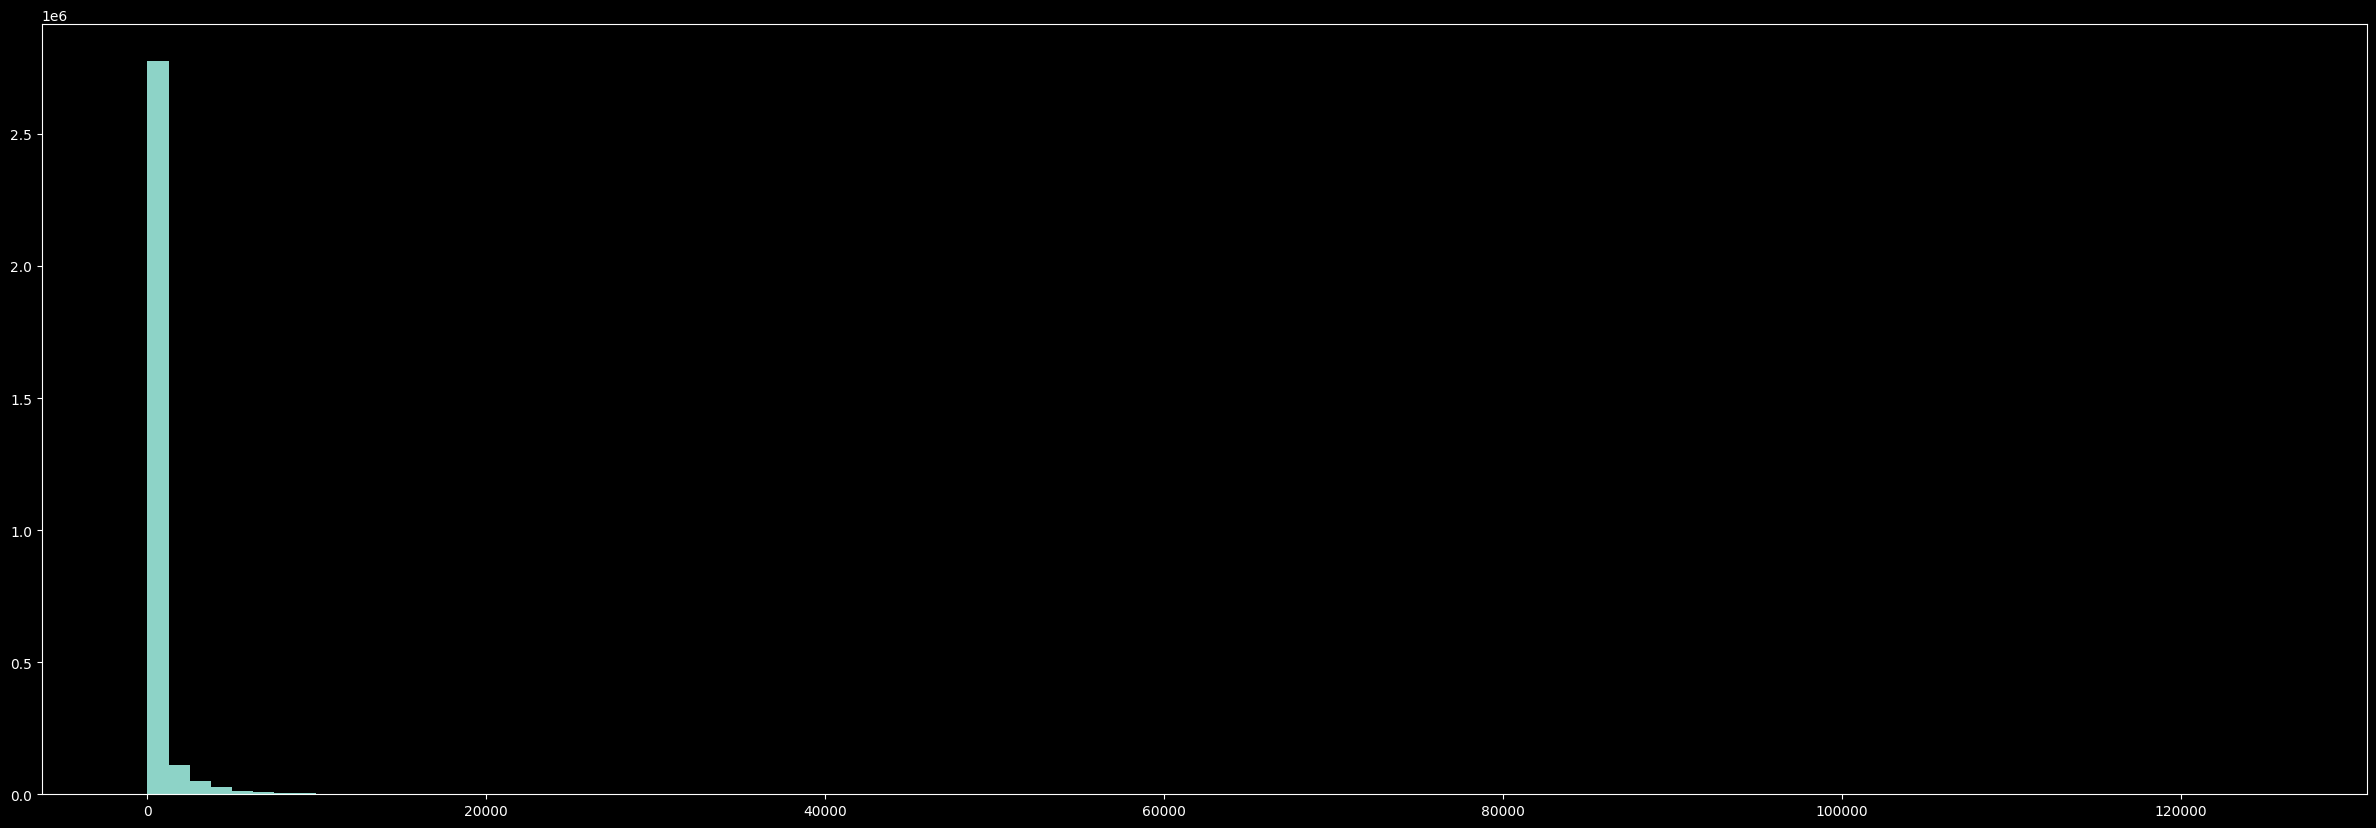

In [37]:
plt.figure(figsize=(30,10))
sales = training_data["sales"]
plt.hist(sales, bins=100);

**Zero inflated dataset**

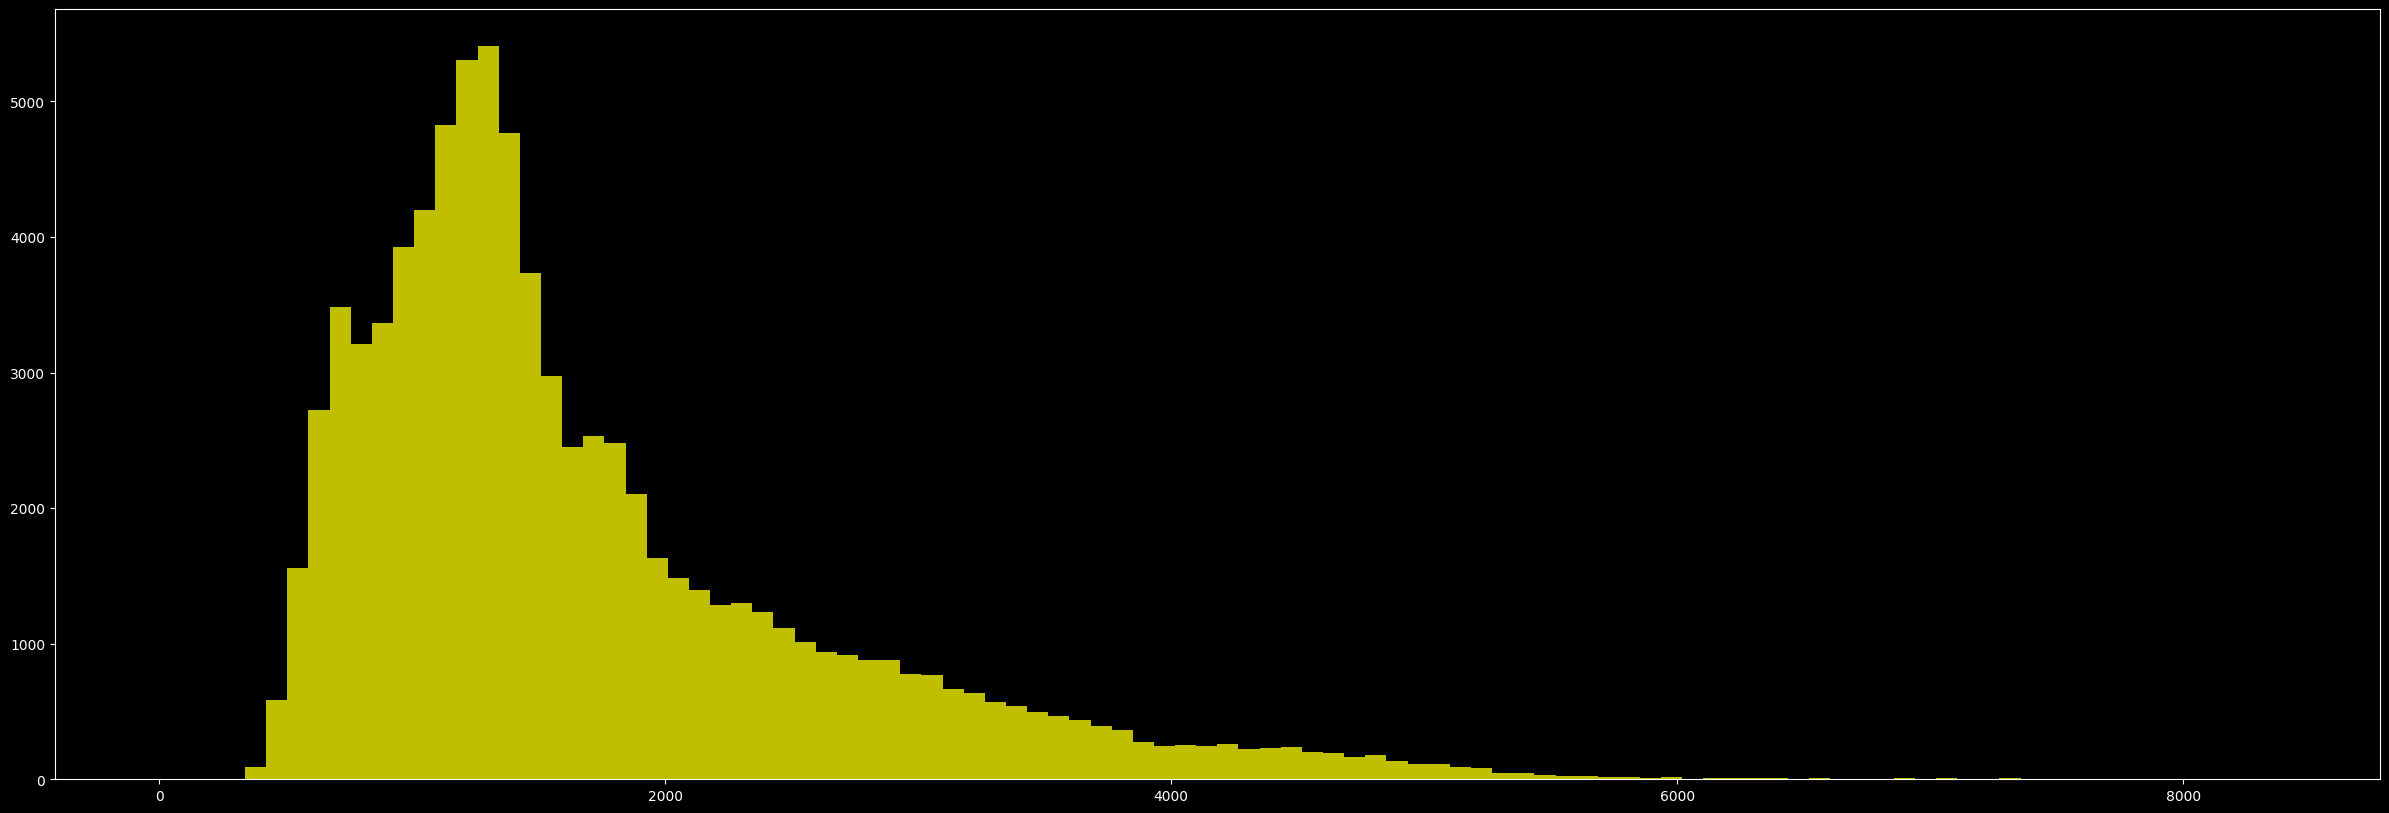

In [38]:
plt.figure(figsize=(30,10))
plt.hist(transaction_data["transactions"], bins=100, color="y");

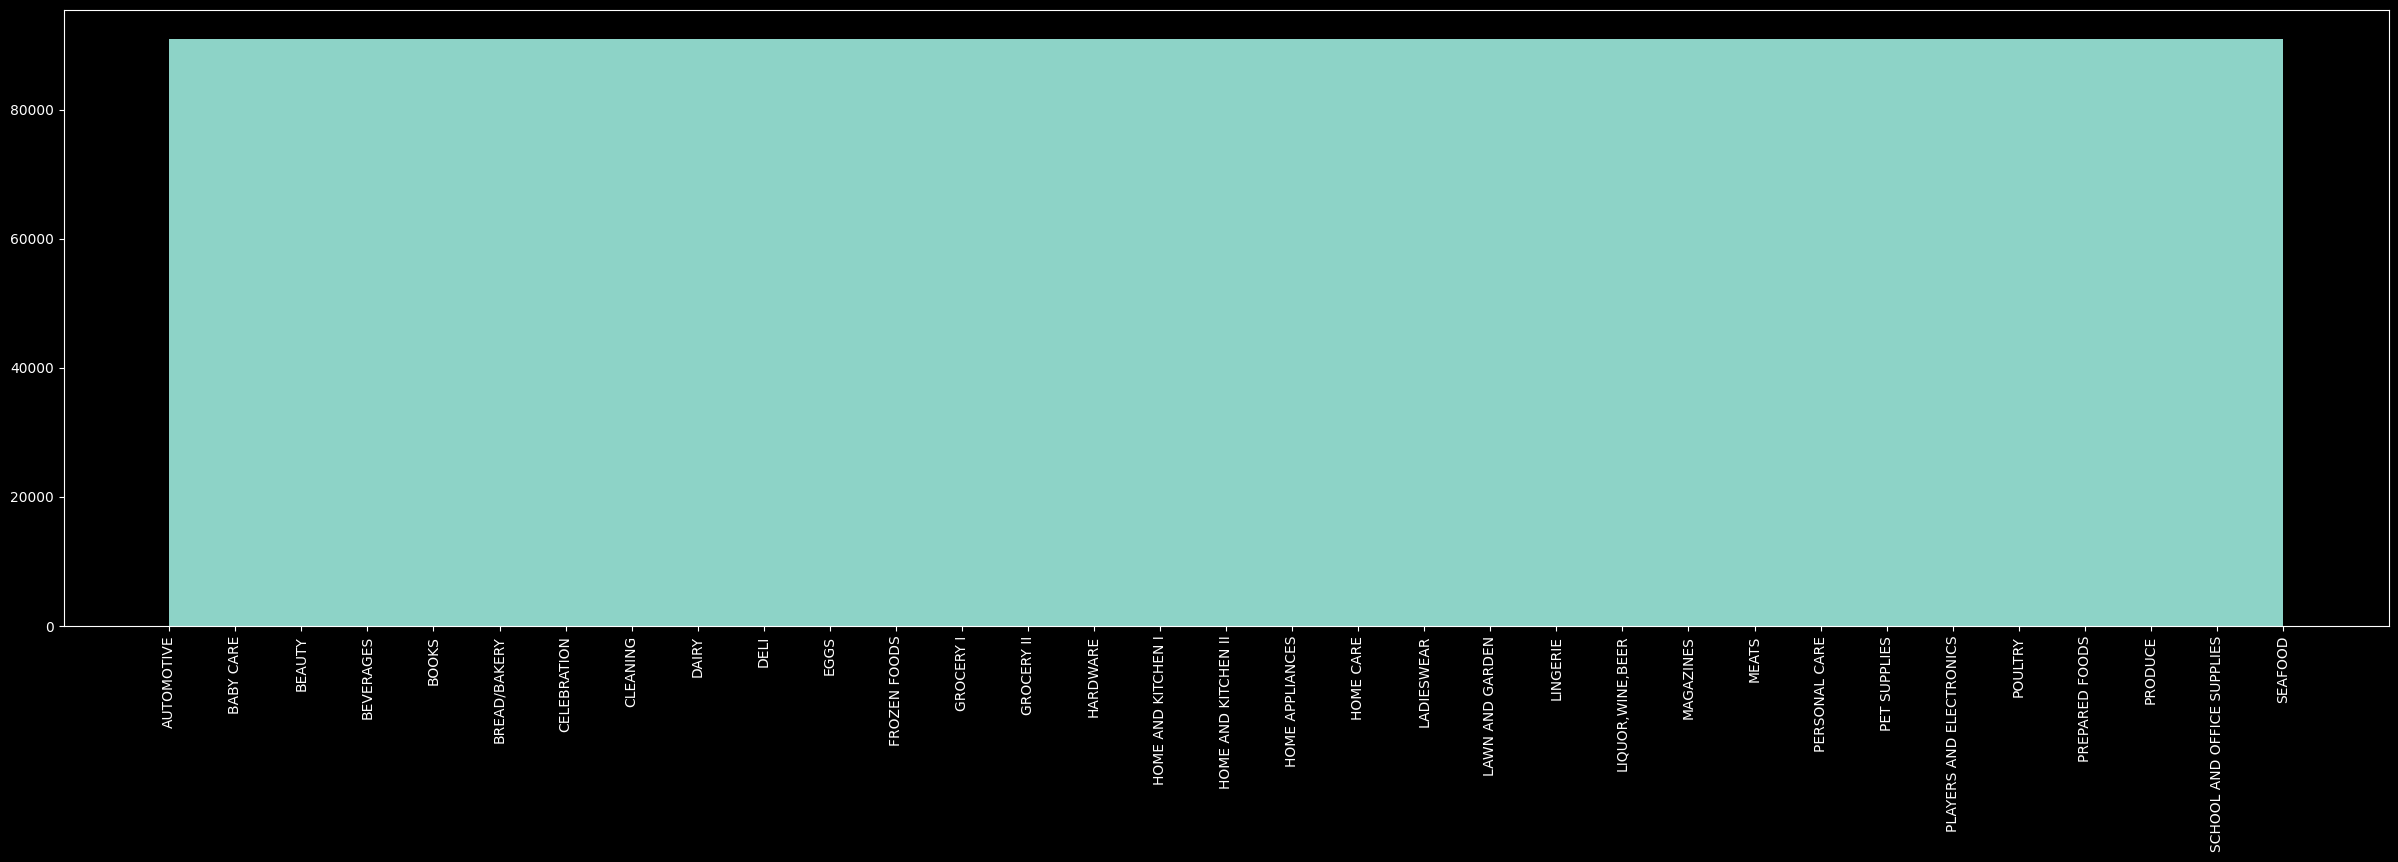

In [39]:
plt.figure(figsize=(30,8))
plt.xticks(rotation=90)
plt.hist(training_data.family, bins=33);

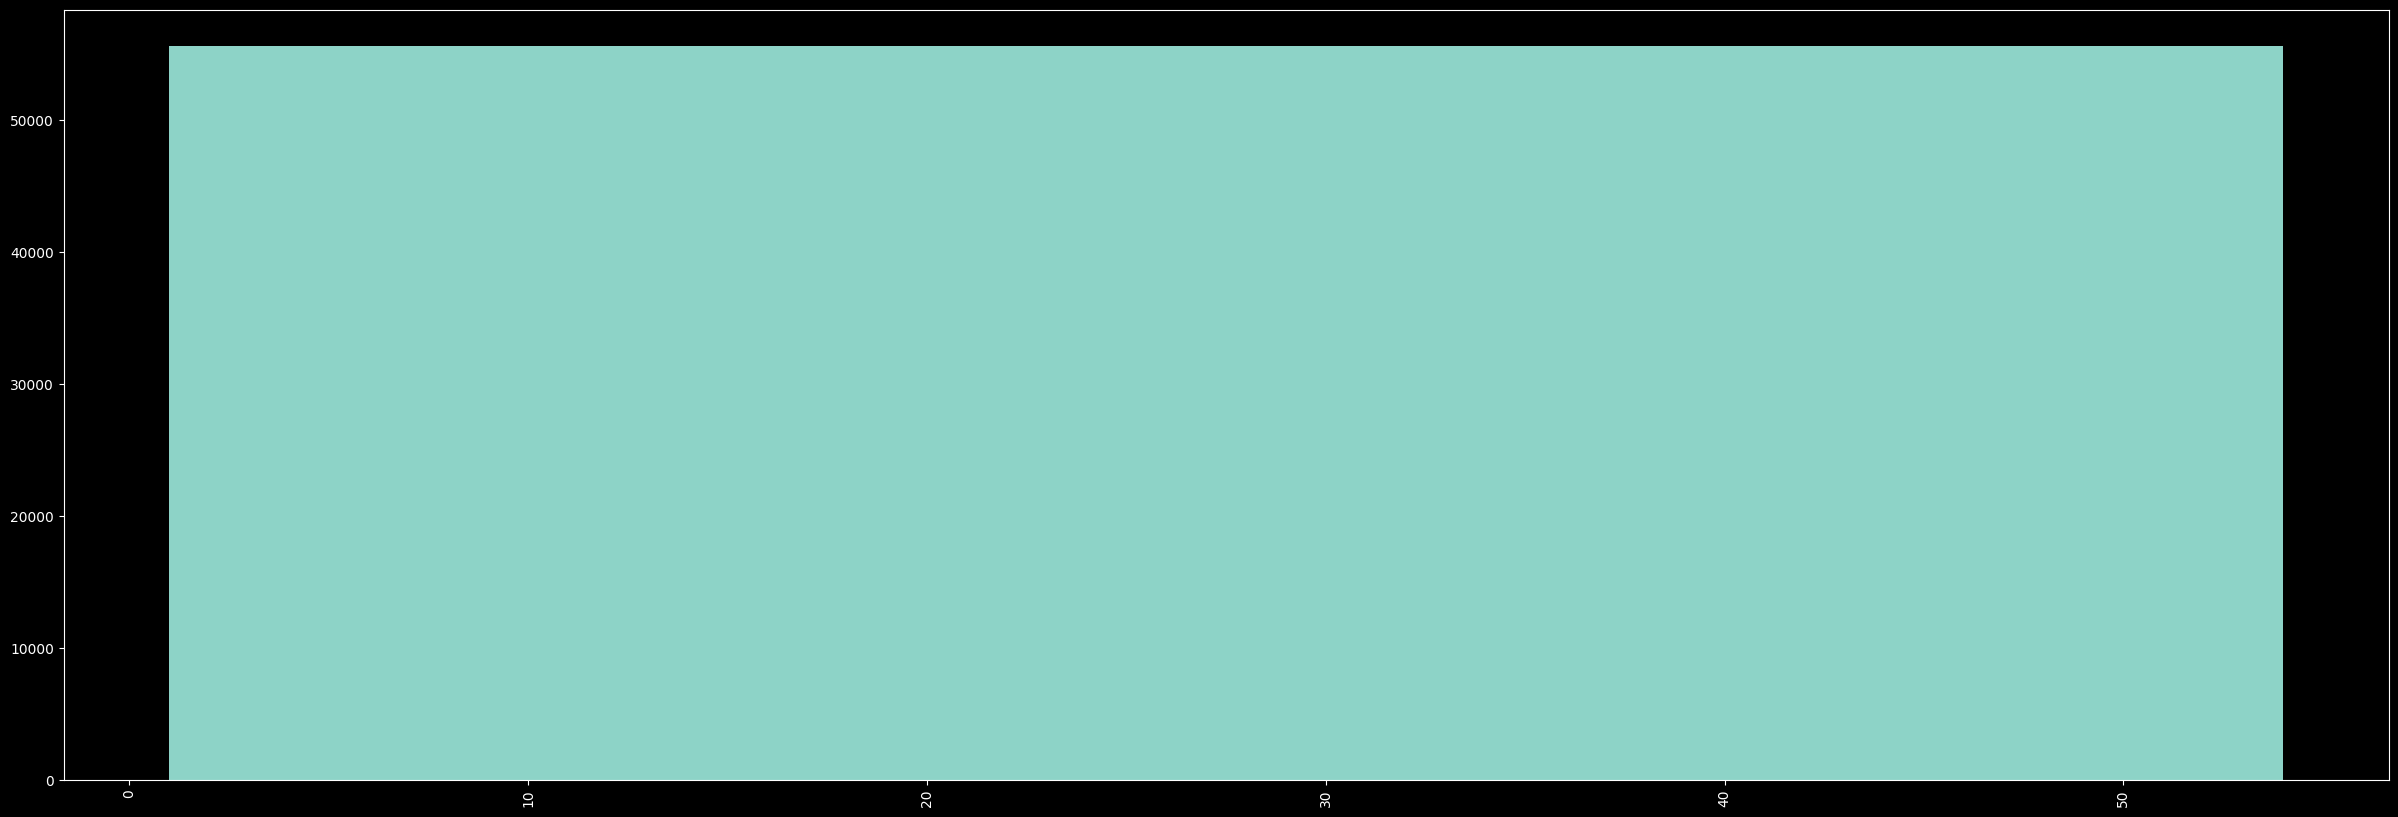

In [40]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
plt.hist(training_data.store_nbr, bins=54);

<h1><u>Feature Engineering</u></h1>

In [41]:
all_data = all_data[all_data["date"] >= training_date_min]

In [42]:
all_data.head()

,date,store_nbr,family,sales,onpromotion
id,,,,,
2325510,2016-08-01,1,AUTOMOTIVE,3.0,0
2325511,2016-08-01,1,BABY CARE,0.0,0
2325512,2016-08-01,1,BEAUTY,3.0,0
2325513,2016-08-01,1,BEVERAGES,2418.0,10
2325514,2016-08-01,1,BOOKS,0.0,0


In [43]:
def get_time_columns(df):
    df["year"] = df["date"].dt.year
    df["month"] = df["date"].dt.month
    df["day"] = df["date"].dt.day
    df["day_of_week"] = df["date"].dt.dayofweek
    df["day_of_year"] = df["date"].dt.day_of_year
    return df

In [44]:
all_data = get_time_columns(all_data)

In [45]:
def merge_dfs(df, merging_and_on):
    for m_a_o in merging_and_on:
        df = df.merge(m_a_o[0], on=m_a_o[1], how="left")
    return df

In [46]:
nat_hols_copy = national_hol_dates.drop(columns=["transferred", "type", "description", "locale_name"])

merging_and_on = [
    [stores_data, "store_nbr"],
    [oil_data, "date"],
    [transaction_data, ["date", "store_nbr"]],
    [nat_hols_copy, "date"]
]

all_data = merge_dfs(all_data, merging_and_on)

In [47]:
for date in rows_to_drop.index:
    if date in all_data["date"].values:
        all_data[all_data["date"] == date] = np.nan

dates_to_drop = all_data["date"].isna()
dates_to_drop = dates_to_drop[dates_to_drop == True]

In [48]:
all_data = all_data.drop(dates_to_drop.index)
all_data.shape

(678942, 17)

In [49]:
lags

[1, 7, 14, 21, 28]

In [50]:
cols = ["sales"]

for col in cols:
    for lag in lags:
        all_data[f"lag_{col}_{lag}"]= all_data[col].shift(lag)
        
all_data = all_data.ffill()

In [51]:
# all_data["day_of_week_mean"] = all_data.groupby("day_of_week")["sales"].transform("mean")
all_data["day_of_week_family_store_mean"] = all_data.groupby(["day_of_week", "family", "store_nbr"])["sales"].transform("mean")
all_data["family_store_mean"] = all_data.groupby(["family", "store_nbr"])["sales"].transform("mean")

In [52]:
all_data.columns

Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'year', 'month',
       'day', 'day_of_week', 'day_of_year', 'city', 'state', 'type', 'cluster',
       'dcoilwtico', 'transactions', 'locale', 'lag_sales_1', 'lag_sales_7',
       'lag_sales_14', 'lag_sales_21', 'lag_sales_28',
       'day_of_week_family_store_mean', 'family_store_mean'],
      dtype='object')

In [53]:
int_cols = ["sales", "onpromotion", "year", "month", "day", "day_of_week", "day_of_year", "cluster", "transactions"]
all_data[int_cols] = all_data[int_cols].astype(int)

In [54]:
from sklearn.preprocessing import OrdinalEncoder

OE = OrdinalEncoder()

In [55]:
cat_cols = ["store_nbr", "family", "city", "state", "type", "cluster", "locale"]
all_data[cat_cols] = all_data[cat_cols].astype("category")
all_data[cat_cols] = OE.fit_transform(all_data[cat_cols])

In [56]:
all_data["locale"] = np.where(pd.isna(all_data["locale"]), False, True)
all_data["locale"] = all_data["locale"].astype(bool)

In [57]:
mean_hols = all_data.loc[all_data["locale"] == True, "sales"].mean()
all_data["mean_hols"] = np.where(all_data["locale"] == True, mean_hols, np.nan)

In [58]:
# This is iterative testing

all_data = all_data.drop(columns=["locale"])

In [59]:
all_data

,date,store_nbr,family,sales,onpromotion,year,month,day,day_of_week,day_of_year,...,dcoilwtico,transactions,lag_sales_1,lag_sales_7,lag_sales_14,lag_sales_21,lag_sales_28,day_of_week_family_store_mean,family_store_mean,mean_hols
0,2016-08-01,0.0,0.0,3,0,2016,8,1,0,214,...,40.05,1750,NaN,NaN,NaN,NaN,NaN,4.418182,4.506562,NaN
1,2016-08-01,0.0,1.0,0,0,2016,8,1,0,214,...,40.05,1750,3.0,NaN,NaN,NaN,NaN,0.581818,0.671916,NaN
2,2016-08-01,0.0,2.0,3,0,2016,8,1,0,214,...,40.05,1750,0.0,NaN,NaN,NaN,NaN,4.236364,3.905512,NaN
3,2016-08-01,0.0,3.0,2418,10,2016,8,1,0,214,...,40.05,1750,3.0,NaN,NaN,NaN,NaN,2246.018182,2063.165354,NaN
4,2016-08-01,0.0,4.0,0,0,2016,8,1,0,214,...,40.05,1750,2418.0,NaN,NaN,NaN,NaN,1.163636,1.160105,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703885,2017-08-31,8.0,28.0,16,1,2017,8,31,3,243,...,47.26,2155,16.0,16.0,16.0,16.0,16.0,323.837927,436.963296,447.87592
703886,2017-08-31,8.0,29.0,16,0,2017,8,31,3,243,...,47.26,2155,16.0,16.0,16.0,16.0,16.0,98.805327,115.688428,447.87592
703887,2017-08-31,8.0,30.0,16,1,2017,8,31,3,243,...,47.26,2155,16.0,16.0,16.0,16.0,16.0,1173.551545,1585.869044,447.87592
703888,2017-08-31,8.0,31.0,16,9,2017,8,31,3,243,...,47.26,2155,16.0,16.0,16.0,16.0,16.0,12.254545,14.763780,447.87592


<h1><u>Models and testing</u></h1>

In [60]:
x_train = all_data[(all_data["date"] >= training_date_min) & (all_data["date"] < pd.to_datetime("2017-08-01"))]
y_train = x_train["sales"]
x_train = x_train.drop(columns=["sales", "date"])

In [61]:
x_test = all_data[(all_data["date"] < to_predict["date"].min()) & (all_data["date"] >= pd.to_datetime("2017-08-01"))]
y_test = x_test["sales"]
x_test = x_test.drop(columns=["sales", "date"])

In [62]:
total_train_x = pd.concat([x_train, x_test])
total_train_y = pd.concat([y_train, y_test])

In [63]:
submission_data = all_data[all_data["date"] >= to_predict["date"].min()].drop(columns=["sales", "date"])

In [64]:
from lightgbm import LGBMRegressor, plot_importance

In [65]:
model = LGBMRegressor(
    objective='tweedie',
    learning_rate=0.06,
    num_leaves=50,
    max_depth=8,
    feature_fraction=0.8,
    bagging_fraction=0.8,
    bagging_freq=5,
    lambda_l1=0,
    lambda_l2=0,
    metric='rmse',
    verbosity=-1
)

In [66]:
model.fit(x_train, y_train)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, feature_fraction=0.8,
              lambda_l1=0, lambda_l2=0, learning_rate=0.06, max_depth=8,
              metric='rmse', num_leaves=50, objective='tweedie', verbosity=-1)

In [67]:
pred = model.predict(x_test)
pred[pred < 0] = 0

In [68]:
from sklearn.metrics import mean_squared_log_error

score = np.sqrt(mean_squared_log_error(pred, y_test))

In [69]:
score

0.4312234889382378

best: 0.42419982644701254, before hyperparameter tuning

<Figure size 3000x800 with 0 Axes>

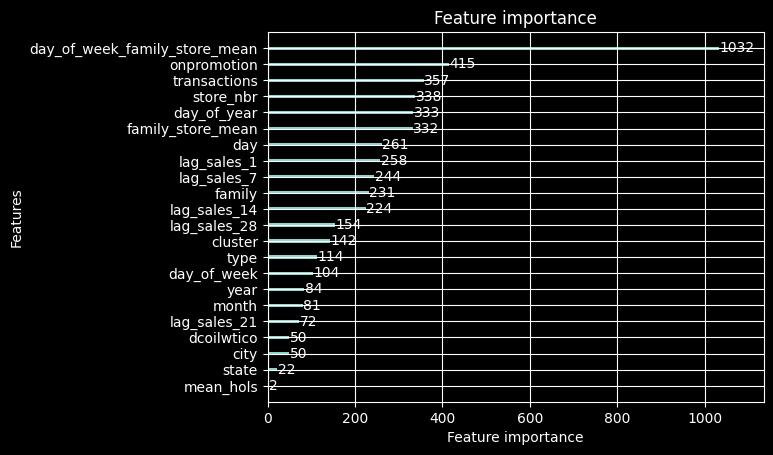

<Figure size 3000x800 with 0 Axes>

In [70]:
plot_importance(model)
plt.figure(figsize=(30, 8))

<h1><u>Final Result</u></h1>

In [71]:
model = LGBMRegressor(
    objective='tweedie',
    learning_rate=0.06,
    num_leaves=50,
    max_depth=8,
    feature_fraction=0.8,
    bagging_fraction=0.8,
    bagging_freq=5,
    lambda_l1=0,
    lambda_l2=0,
    metric='rmse',
    verbosity=-1
)

In [72]:
model.fit(total_train_x, total_train_y) 

LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, feature_fraction=0.8,
              lambda_l1=0, lambda_l2=0, learning_rate=0.06, max_depth=8,
              metric='rmse', num_leaves=50, objective='tweedie', verbosity=-1)

In [73]:
final_pred = model.predict(submission_data)
final_pred[final_pred < 0] = 0

In [74]:
result = pd.DataFrame(data=final_pred, index=to_predict.index, columns=["sales"])

In [75]:
result.to_csv("/kaggle/working/result.csv")

In [76]:
result.head(20)

,sales
id,
3000888,4.538856
3000889,0.004378
3000890,5.733260
3000891,2245.667124
3000892,0.616654
3000893,440.161503
3000894,17.045011
3000895,831.903387
3000896,884.660418
